In [797]:
#https://gitlab.com/dword4/nhlapi/-/blob/master/stats-api.md

In [798]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [799]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [800]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [801]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
pd.set_option('display.max_columns', None)

In [802]:
import requests

link = 'https://statsapi.web.nhl.com/api/v1/teams'
f = requests.get(link)
#print(f.text)

In [803]:
import requests

link = 'https://statsapi.web.nhl.com/api/v1/people/8471215/stats?stats=statsSingleSeason&season=20232024'
f = requests.get(link)
#print(f.text)

In [804]:
import requests

link = 'https://statsapi.web.nhl.com/api/v1/people/8471215/stats?stats=gameLog&season=20232024'
f = requests.get(link)
#print(f.text)

In [805]:
#  "id" : 8471215,
#       "fullName" : "Evgeni Malkin",
#       "link" : "/api/v1/people/8471215"

In [819]:
import requests

link = 'https://statsapi.web.nhl.com/api/v1/teams/'
f = requests.get(link)
#print(f.text)
df=pd.DataFrame(f.json()['teams'])
df=df[['name','link']]
df['Teamid']=df['link'].str[-2:].str.replace('/','')
df['TeamName']=df['name']
Teams=df[['TeamName','Teamid']]
Teams

,TeamName,Teamid
0,New Jersey Devils,1
1,New York Islanders,2
2,New York Rangers,3
3,Philadelphia Flyers,4
4,Pittsburgh Penguins,5
5,Boston Bruins,6
6,Buffalo Sabres,7
7,Montréal Canadiens,8
8,Ottawa Senators,9
9,Toronto Maple Leafs,10


In [807]:

idlist = Teams['Teamid'].tolist()
#teamnamelist = Teams['TeamName'].tolist()
NHLRoster=pd.DataFrame()
links=[]
Name=[]
teamid=[]
#df=pd.DataFrame(f.json()['roster'][0])
#df
for j in idlist:
    link = 'https://statsapi.web.nhl.com/api/v1/teams/'+j+'/roster'
    f = requests.get(link)

    for i in range(0,40):
        try:
            #print(f.json()['roster'][i]['person']['link'])
            links.append(f.json()['roster'][i]['person']['link'])
            teamid.append(j)
            #print(f.json()['roster'][i]['person']['fullName'])
            Name.append(f.json()['roster'][i]['person']['fullName'])
        except:
            #print('break')
            break


NHLRoster['Teamid']=teamid
NHLRoster['Teamid']=NHLRoster['Teamid']
NHLRoster = pd.merge(NHLRoster, Teams[['TeamName','Teamid']], on='Teamid', how='left')
NHLRoster['Name']=Name
NHLRoster['Link']=links
NHLRoster['Playerid'] = NHLRoster['Link'].str[-7:]
NHLRoster['Playerid'] = NHLRoster['Playerid']
NHLRoster
#df=pd.DataFrame(f.json()['roster'])
# for i in range(0,df.shape[0]+1):
#     df[i].iat[2,0]
#print(f.text)
# print(jason)
#df.shape[0]
#df
#w.iat[2,0]


,Teamid,TeamName,Name,Link,Playerid
0,1,New Jersey Devils,Tomas Nosek,/api/v1/people/8477931,8477931
1,1,New Jersey Devils,Brendan Smith,/api/v1/people/8474090,8474090
2,1,New Jersey Devils,Erik Haula,/api/v1/people/8475287,8475287
3,1,New Jersey Devils,Tyler Toffoli,/api/v1/people/8475726,8475726
4,1,New Jersey Devils,Ondrej Palat,/api/v1/people/8476292,8476292
...,...,...,...,...,...
749,55,Seattle Kraken,Joey Daccord,/api/v1/people/8478916,8478916
750,55,Seattle Kraken,Kailer Yamamoto,/api/v1/people/8479977,8479977
751,55,Seattle Kraken,Eeli Tolvanen,/api/v1/people/8480009,8480009
752,55,Seattle Kraken,Tye Kartye,/api/v1/people/8481789,8481789


In [808]:
NHLRoster[NHLRoster['Playerid']=='8477424']

,Teamid,TeamName,Name,Link,Playerid
384,18,Nashville Predators,Juuse Saros,/api/v1/people/8477424,8477424


In [809]:
link = 'https://statsapi.web.nhl.com/api/v1/people/8477424/stats?stats=gameLog&season=20232024'
f = requests.get(link)
#print(f.json()['stats'][0]['splits'])
#            goals.append(f.json()['stats'][0]['splits'][i]['stat']['goals'])

pd.DataFrame(f.json()['stats'][0]['splits'][2])


,season,stat,team,opponent,date,isHome,isWin,isOT,game
timeOnIce,20232024,18:52,NaN,NaN,2023-10-17,True,False,False,NaN
ot,20232024,0,NaN,NaN,2023-10-17,True,False,False,NaN
shutouts,20232024,0,NaN,NaN,2023-10-17,True,False,False,NaN
saves,20232024,7,NaN,NaN,2023-10-17,True,False,False,NaN
powerPlaySaves,20232024,1,NaN,NaN,2023-10-17,True,False,False,NaN
shortHandedSaves,20232024,0,NaN,NaN,2023-10-17,True,False,False,NaN
evenSaves,20232024,6,NaN,NaN,2023-10-17,True,False,False,NaN
shortHandedShots,20232024,0,NaN,NaN,2023-10-17,True,False,False,NaN
evenShots,20232024,9,NaN,NaN,2023-10-17,True,False,False,NaN
powerPlayShots,20232024,2,NaN,NaN,2023-10-17,True,False,False,NaN


In [810]:
import requests
NHLRoster
Playeridlist = NHLRoster['Playerid'].tolist()

playerStats=pd.DataFrame()
opponent=[]
date=[]
points=[]
goals=[]
assists=[]
shots=[]
blocked=[]
playerid=[]

for j in Playeridlist:
    link = 'https://statsapi.web.nhl.com/api/v1/people/'+j+'/stats?stats=gameLog&season=20232024'
    f = requests.get(link)
    #print(f.text)
    # df=pd.DataFrame(f.json()['stats'][0]['splits'])
    # df=pd.DataFrame(f.json()['stats'][0]['splits'][3])
    for i in range(0,85):
        try:
            
            points.append(f.json()['stats'][0]['splits'][i]['stat']['points'])
            goals.append(f.json()['stats'][0]['splits'][i]['stat']['goals'])
            assists.append(f.json()['stats'][0]['splits'][i]['stat']['assists'])
            shots.append(f.json()['stats'][0]['splits'][i]['stat']['shots'])
            blocked.append(f.json()['stats'][0]['splits'][i]['stat']['blocked'])
            opponent.append(f.json()['stats'][0]['splits'][i]['opponent']['name'])
            date.append(f.json()['stats'][0]['splits'][i]['date'])
            playerid.append(j)
            #print(f.json()['stats'][0]['splits'][3]['stat']['assists'])
            #print(f.json()['stats'][0]['splits'][3]['stat']['shots'])
            #print(f.json()['stats'][0]['splits'][3]['stat']['goals'])
            #print(f.json()['stats'][0]['splits'][3]['stat']['blocked'])
            #print(f.json()['stats'][0]['splits'][3]['stat']['points'])
            #print(f.json()['stats'][0]['splits'][3]['date'])
            #print(f.json()['stats'][0]['splits'][3]['opponent']['name'])
        except:
            #print('break')
            break

#playerStats['Teamid']=teamid
playerStats['Playerid']=playerid
playerStats['Opponent']=opponent
playerStats['Date']=date
playerStats['Date']=pd.to_datetime(playerStats['Date'])
playerStats['Points']=points
playerStats['Goals']=goals
playerStats['Assists']=assists
playerStats['Shots']=shots
playerStats['Blocked']=blocked

playerStats = pd.merge(playerStats, NHLRoster[['Playerid','Name','Teamid','TeamName']], on='Playerid', how='left')
playerStats['GameNumber'] = playerStats.groupby(['Teamid','Name'])['Date'].cumcount(ascending=False)+1
playerStats['GP']=playerStats.groupby('TeamName').GameNumber.transform(np.max)
playerStats
#1m 8s

/var/folders/mk/mqpynx7956n6hbt913946r2m0000gn/T/ipykernel_5589/3330559113.py:56: FutureWarning: The provided callable <function max at 0x10d5f7310> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  playerStats['GP']=playerStats.groupby('TeamName').GameNumber.transform(np.max)


,Playerid,Opponent,Date,Points,Goals,Assists,Shots,Blocked,Name,Teamid,TeamName,GameNumber,GP
0,8477931,Arizona Coyotes,2023-10-13,0,0,0,0,1,Tomas Nosek,1,New Jersey Devils,2,4
1,8477931,Detroit Red Wings,2023-10-12,0,0,0,1,0,Tomas Nosek,1,New Jersey Devils,1,4
2,8474090,New York Islanders,2023-10-20,0,0,0,2,1,Brendan Smith,1,New Jersey Devils,4,4
3,8474090,Florida Panthers,2023-10-16,0,0,0,0,0,Brendan Smith,1,New Jersey Devils,3,4
4,8474090,Arizona Coyotes,2023-10-13,0,0,0,5,1,Brendan Smith,1,New Jersey Devils,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920,8482665,Carolina Hurricanes,2023-10-19,1,0,1,1,0,Matty Beniers,55,Seattle Kraken,5,6
2921,8482665,Colorado Avalanche,2023-10-17,0,0,0,2,0,Matty Beniers,55,Seattle Kraken,4,6
2922,8482665,St. Louis Blues,2023-10-14,0,0,0,2,0,Matty Beniers,55,Seattle Kraken,3,6
2923,8482665,Nashville Predators,2023-10-12,0,0,0,0,0,Matty Beniers,55,Seattle Kraken,2,6


In [811]:
import numpy as np
#playerStats

OpponentStats=pd.DataFrame()

OpponentStats['Opponent']=playerStats['Opponent']

OpponentStats['PointsAgainst']=playerStats.groupby('Opponent').Points.transform(np.sum)
OpponentStats['GoalsAgainst']=playerStats.groupby('Opponent').Goals.transform(np.sum)
OpponentStats['AssistsAgainst']=playerStats.groupby('Opponent').Assists.transform(np.sum)
OpponentStats['ShotsAgainst']=playerStats.groupby('Opponent').Shots.transform(np.sum)
OpponentStats['BlockedAgainst']=playerStats.groupby('Opponent').Blocked.transform(np.sum)

OpponentStats=OpponentStats.merge(playerStats[['TeamName','GP']],left_on='Opponent',right_on='TeamName',how='left')

OpponentStats=OpponentStats.drop(columns=['TeamName']).drop_duplicates().reset_index(drop=True)

OpponentStats['AvgPointsAgainst']=OpponentStats['PointsAgainst']/OpponentStats['GP']
OpponentStats['AvgGoalsAgainst']=OpponentStats['GoalsAgainst']/OpponentStats['GP']
OpponentStats['AvgAssistsAgainst']=OpponentStats['AssistsAgainst']/OpponentStats['GP']
OpponentStats['AvgShotsAgainst']=OpponentStats['ShotsAgainst']/OpponentStats['GP']
OpponentStats['AvgBlockedAgainst']=OpponentStats['BlockedAgainst']/OpponentStats['GP']
OpponentStats['GoalsPerShot']=OpponentStats['GoalsAgainst']/OpponentStats['ShotsAgainst']

#OpponentStats=OpponentStats.drop_duplicates()#.reset_index(drop=True)
OpponentStats['GoalsPerShotRank']=OpponentStats['GoalsPerShot'].rank()

OpponentStats['PointsAgainstRank']=OpponentStats['AvgPointsAgainst'].rank()
OpponentStats['GoalsAgainstRank']=OpponentStats['AvgGoalsAgainst'].rank()
OpponentStats['AssistsAgainstRank']=OpponentStats['AvgAssistsAgainst'].rank()
OpponentStats['ShotsAgainstRank']=OpponentStats['AvgShotsAgainst'].rank()
OpponentStats['BlockedAgainstRank']=OpponentStats['AvgBlockedAgainst'].rank()

OpponentStats=OpponentStats[['Opponent', 'GP','GoalsPerShotRank', 'GoalsPerShot','ShotsAgainstRank', 'ShotsAgainst',
       'PointsAgainstRank', 'PointsAgainst', 'GoalsAgainstRank', 'GoalsAgainst', 'AssistsAgainstRank', 'AssistsAgainst',
       'BlockedAgainstRank','BlockedAgainst', 
       'AvgPointsAgainst','AvgGoalsAgainst', 'AvgAssistsAgainst', 'AvgShotsAgainst','AvgBlockedAgainst']]

OpponentStats.sort_values(by=['ShotsAgainstRank']).reset_index(drop=True)

/var/folders/mk/mqpynx7956n6hbt913946r2m0000gn/T/ipykernel_5589/91759070.py:8: FutureWarning: The provided callable <function sum at 0x10d5f3ca0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  OpponentStats['PointsAgainst']=playerStats.groupby('Opponent').Points.transform(np.sum)
/var/folders/mk/mqpynx7956n6hbt913946r2m0000gn/T/ipykernel_5589/91759070.py:9: FutureWarning: The provided callable <function sum at 0x10d5f3ca0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  OpponentStats['GoalsAgainst']=playerStats.groupby('Opponent').Goals.transform(np.sum)
/var/folders/mk/mqpynx7956n6hbt913946r2m0000gn/T/ipykernel_5589/91759070.py:10: FutureWarning: The provided callable <function sum at 0x10d5f3ca0> is currently using SeriesGroupBy.sum. In a 

,Opponent,GP,GoalsPerShotRank,GoalsPerShot,ShotsAgainstRank,ShotsAgainst,PointsAgainstRank,PointsAgainst,GoalsAgainstRank,GoalsAgainst,AssistsAgainstRank,AssistsAgainst,BlockedAgainstRank,BlockedAgainst,AvgPointsAgainst,AvgGoalsAgainst,AvgAssistsAgainst,AvgShotsAgainst,AvgBlockedAgainst
0,New York Rangers,5,17.0,0.100840,1.0,119,7.0,33,6.0,12,8.0,21,21.0,83,6.600000,2.400000,4.200000,23.800000,16.600000
1,Ottawa Senators,5,23.0,0.111940,2.0,134,16.5,42,16.0,15,17.0,27,7.0,71,8.400000,3.000000,5.400000,26.800000,14.200000
2,Carolina Hurricanes,6,32.0,0.182927,3.0,164,32.0,77,32.0,30,32.0,47,32.0,119,12.833333,5.000000,7.833333,27.333333,19.833333
3,Philadelphia Flyers,5,14.0,0.094891,4.0,137,8.5,34,10.5,13,8.0,21,11.0,74,6.800000,2.600000,4.200000,27.400000,14.800000
4,Pittsburgh Penguins,5,19.0,0.107914,5.5,139,20.0,44,16.0,15,21.5,29,24.5,84,8.800000,3.000000,5.800000,27.800000,16.800000
5,Los Angeles Kings,5,28.0,0.129496,5.5,139,23.0,48,23.0,18,24.5,30,21.0,83,9.600000,3.600000,6.000000,27.800000,16.600000
6,Vegas Golden Knights,6,4.0,0.065868,7.0,167,3.0,29,4.0,11,3.0,18,28.0,109,4.833333,1.833333,3.000000,27.833333,18.166667
7,Colorado Avalanche,5,2.0,0.057143,8.0,140,2.0,21,2.0,8,1.5,13,14.0,78,4.200000,1.600000,2.600000,28.000000,15.600000
8,Toronto Maple Leafs,5,30.0,0.133803,9.0,142,24.0,49,26.5,19,24.5,30,29.0,93,9.800000,3.800000,6.000000,28.400000,18.600000
9,Buffalo Sabres,6,18.0,0.104046,10.5,173,15.0,50,16.0,18,16.0,32,27.0,105,8.333333,3.000000,5.333333,28.833333,17.500000


In [812]:
ExpandedStats=playerStats#[(playerStats['TeamName']=='Boston Bruins')]#|(playerStats['TeamName']=='Anaheim Ducks')]
ExpandedStats=ExpandedStats[['TeamName','Name','Points','Goals','Assists','Shots','Blocked','Opponent','Date','GameNumber','GP']]

ExpandedStats['TotalPoints']=ExpandedStats.groupby(['Name','TeamName']).Points.transform(np.sum)
ExpandedStats['AvgPoints']=ExpandedStats['TotalPoints']/ExpandedStats['GP']
ExpandedStats['TotalGoals']=ExpandedStats.groupby(['Name','TeamName']).Goals.transform(np.sum)
ExpandedStats['AvgGoals']=ExpandedStats['TotalGoals']/ExpandedStats['GP']
ExpandedStats['TotalAssists']=ExpandedStats.groupby(['Name','TeamName']).Assists.transform(np.sum)
ExpandedStats['AvgAssists']=ExpandedStats['TotalAssists']/ExpandedStats['GP']
ExpandedStats['TotalShots']=ExpandedStats.groupby(['Name','TeamName']).Shots.transform(np.sum)
ExpandedStats['AvgShots']=ExpandedStats['TotalShots']/ExpandedStats['GP']
ExpandedStats['TotalBlocked']=ExpandedStats.groupby(['Name','TeamName']).Blocked.transform(np.sum)
ExpandedStats['AvgBlocked']=ExpandedStats['TotalBlocked']/ExpandedStats['GP']

ExpandedStats['OverallZScorePoints'] = np.abs(stats.zscore(ExpandedStats['Points']))
ExpandedStats['OverallZScoreGoals'] = np.abs(stats.zscore(ExpandedStats['Goals']))
ExpandedStats['OverallZScoreAssists'] = np.abs(stats.zscore(ExpandedStats['Assists']))
ExpandedStats['OverallZScoreShots'] = np.abs(stats.zscore(ExpandedStats['Shots']))
ExpandedStats['OverallZScoreBlocked'] = np.abs(stats.zscore(ExpandedStats['Blocked']))

ExpandedStats['TotalOverallZScorePoints']=ExpandedStats.groupby(['Name','TeamName']).OverallZScorePoints.transform(np.sum)
ExpandedStats['AvgOverallZScorePoints']=ExpandedStats['TotalOverallZScorePoints']/ExpandedStats['GP']
ExpandedStats['TotalOverallZScoreGoals']=ExpandedStats.groupby(['Name','TeamName']).OverallZScoreGoals.transform(np.sum)
ExpandedStats['AvgOverallZScoreGoals']=ExpandedStats['TotalOverallZScoreGoals']/ExpandedStats['GP']
ExpandedStats['TotalOverallZScoreAssists']=ExpandedStats.groupby(['Name','TeamName']).OverallZScoreAssists.transform(np.sum)
ExpandedStats['AvgOverallZScoreAssists']=ExpandedStats['TotalOverallZScoreAssists']/ExpandedStats['GP']
ExpandedStats['TotalOverallZScoreShots']=ExpandedStats.groupby(['Name','TeamName']).OverallZScoreShots.transform(np.sum)
ExpandedStats['AvgOverallZScoreShots']=ExpandedStats['TotalOverallZScoreShots']/ExpandedStats['GP']
ExpandedStats['TotalOverallZScoreBlocked']=ExpandedStats.groupby(['Name','TeamName']).OverallZScoreBlocked.transform(np.sum)
ExpandedStats['AvgOverallZScoreBlocked']=ExpandedStats['TotalOverallZScoreBlocked']/ExpandedStats['GP']

ExpandedStats=ExpandedStats.drop_duplicates()
lastFive=ExpandedStats[ExpandedStats['GameNumber'] >= ExpandedStats['GP']-5]
lastFive['GP']=lastFive.groupby('TeamName').GameNumber.transform(np.max)

lastFive['LastFiveTotalPoints']=lastFive.groupby('Name').Points.transform(np.sum)
lastFive['LastFiveAvgPoints']=lastFive['TotalPoints']/lastFive['GP']
lastFive['LastFiveTotalGoals']=lastFive.groupby('Name').Goals.transform(np.sum)
lastFive['LastFiveAvgGoals']=lastFive['TotalGoals']/lastFive['GP']
lastFive['LastFiveTotalAssists']=lastFive.groupby('Name').Assists.transform(np.sum)
lastFive['LastFiveAvgAssists']=lastFive['TotalAssists']/lastFive['GP']
lastFive['LastFiveTotalShots']=lastFive.groupby('Name').Shots.transform(np.sum)
lastFive['LastFiveAvgShots']=lastFive['TotalShots']/lastFive['GP']
lastFive['LastFiveTotalBlocked']=lastFive.groupby('Name').Blocked.transform(np.sum)
lastFive['LastFiveAvgBlocked']=lastFive['TotalBlocked']/lastFive['GP']

lastFive=lastFive.drop_duplicates()

# lastFive['LastFiveZScorePoints'] = np.abs(stats.zscore(lastFive['Points']))
# lastFive['LastFiveZScoreGoals'] = np.abs(stats.zscore(lastFive['Goals']))
# lastFive['LastFiveZScoreAssists'] = np.abs(stats.zscore(lastFive['Assists']))
# lastFive['LastFiveZScoreShots'] = np.abs(stats.zscore(lastFive['Shots']))
# lastFive['LastFiveZScoreBlocked'] = np.abs(stats.zscore(lastFive['Blocked']))
# lastFive=lastFive.drop_duplicates()


ExpandedStats=ExpandedStats.merge(lastFive[['Name','TeamName', 'LastFiveTotalPoints',
       'LastFiveAvgPoints', 'LastFiveTotalGoals', 'LastFiveAvgGoals',
       'LastFiveTotalAssists', 'LastFiveAvgAssists', 'LastFiveTotalShots',
       'LastFiveAvgShots', 'LastFiveTotalBlocked', 'LastFiveAvgBlocked'
       # ,'LastFiveZScorePoints','LastFiveZScoreGoals','LastFiveZScoreAssists',
       # 'LastFiveZScoreShots','LastFiveZScoreBlocked'
       ]],on=['Name','TeamName'],how='left').drop_duplicates()

ExpandedStats['AboveExpectedPoints']=ExpandedStats['LastFiveAvgPoints']-ExpandedStats['AvgPoints']
ExpandedStats['AboveExpectedGoals']=ExpandedStats['LastFiveAvgGoals']-ExpandedStats['AvgGoals']
ExpandedStats['AboveExpectedAssists']=ExpandedStats['LastFiveAvgAssists']-ExpandedStats['AvgAssists']
ExpandedStats['AboveExpectedShots']=ExpandedStats['LastFiveAvgShots']-ExpandedStats['AvgShots']
ExpandedStats['AboveExpectedBlocked']=ExpandedStats['LastFiveAvgBlocked']-ExpandedStats['AvgBlocked']


ExpandedStats.sort_values(by=['AvgPoints','Name'], ascending=False).reset_index(drop=True)#.head(20)

/var/folders/mk/mqpynx7956n6hbt913946r2m0000gn/T/ipykernel_5589/2506072873.py:4: FutureWarning: The provided callable <function sum at 0x10d5f3ca0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  ExpandedStats['TotalPoints']=ExpandedStats.groupby(['Name','TeamName']).Points.transform(np.sum)
/var/folders/mk/mqpynx7956n6hbt913946r2m0000gn/T/ipykernel_5589/2506072873.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ExpandedStats['TotalPoints']=ExpandedStats.groupby(['Name','TeamName']).Points.transform(np.sum)
/var/folders/mk/mqpynx7956n6hbt913946r2m0000gn/T/ipykernel_5589/2506072873.py:6: FutureWarning: The provided callab

,TeamName,Name,Points,Goals,Assists,Shots,Blocked,Opponent,Date,GameNumber,GP,TotalPoints,AvgPoints,TotalGoals,AvgGoals,TotalAssists,AvgAssists,TotalShots,AvgShots,TotalBlocked,AvgBlocked,OverallZScorePoints,OverallZScoreGoals,OverallZScoreAssists,OverallZScoreShots,OverallZScoreBlocked,TotalOverallZScorePoints,AvgOverallZScorePoints,TotalOverallZScoreGoals,AvgOverallZScoreGoals,TotalOverallZScoreAssists,AvgOverallZScoreAssists,TotalOverallZScoreShots,AvgOverallZScoreShots,TotalOverallZScoreBlocked,AvgOverallZScoreBlocked,LastFiveTotalPoints,LastFiveAvgPoints,LastFiveTotalGoals,LastFiveAvgGoals,LastFiveTotalAssists,LastFiveAvgAssists,LastFiveTotalShots,LastFiveAvgShots,LastFiveTotalBlocked,LastFiveAvgBlocked,AboveExpectedPoints,AboveExpectedGoals,AboveExpectedAssists,AboveExpectedShots,AboveExpectedBlocked
0,New Jersey Devils,Jack Hughes,4,2,2,6,0,New York Islanders,2023-10-20,4,4,10,2.5,4,1.00,6,1.50,22,5.5,0,0.0,4.802099,4.150634,3.040977,2.668145,0.756768,11.067279,2.766820,9.083878,2.270970,9.635632,2.408908,9.424086,2.356022,3.027073,0.756768,10,2.5,4,1.00,6,1.50,22,5.5,0,0.0,0.0,0.0,0.0,0.0,0.0
1,New Jersey Devils,Jack Hughes,1,0,1,6,0,Florida Panthers,2023-10-16,3,4,10,2.5,4,1.00,6,1.50,22,5.5,0,0.0,0.731541,0.391306,1.264138,2.668145,0.756768,11.067279,2.766820,9.083878,2.270970,9.635632,2.408908,9.424086,2.356022,3.027073,0.756768,10,2.5,4,1.00,6,1.50,22,5.5,0,0.0,0.0,0.0,0.0,0.0,0.0
2,New Jersey Devils,Jack Hughes,3,0,3,6,0,Arizona Coyotes,2023-10-13,2,4,10,2.5,4,1.00,6,1.50,22,5.5,0,0.0,3.445246,0.391306,4.817816,2.668145,0.756768,11.067279,2.766820,9.083878,2.270970,9.635632,2.408908,9.424086,2.356022,3.027073,0.756768,10,2.5,4,1.00,6,1.50,22,5.5,0,0.0,0.0,0.0,0.0,0.0,0.0
3,New Jersey Devils,Jack Hughes,2,2,0,4,0,Detroit Red Wings,2023-10-12,1,4,10,2.5,4,1.00,6,1.50,22,5.5,0,0.0,2.088393,4.150634,0.512702,1.419653,0.756768,11.067279,2.766820,9.083878,2.270970,9.635632,2.408908,9.424086,2.356022,3.027073,0.756768,10,2.5,4,1.00,6,1.50,22,5.5,0,0.0,0.0,0.0,0.0,0.0,0.0
4,New Jersey Devils,Jesper Bratt,3,0,3,1,0,New York Islanders,2023-10-20,4,4,8,2.0,3,0.75,5,1.25,10,2.5,2,0.5,3.445246,0.391306,4.817816,0.453085,0.756768,9.604198,2.401049,6.812909,1.703227,7.858793,1.964698,3.745476,0.936369,1.709963,0.427491,8,2.0,3,0.75,5,1.25,10,2.5,2,0.5,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920,Edmonton Oilers,Adam Erne,0,0,0,0,0,Philadelphia Flyers,2023-10-19,3,5,0,0.0,0,0.00,0,0.00,2,0.4,0,0.0,0.625312,0.391306,0.512702,1.077331,0.756768,1.875936,0.375187,1.173917,0.234783,1.538105,0.307621,1.983501,0.396700,2.270305,0.454061,0,0.0,0,0.00,0,0.00,2,0.4,0,0.0,0.0,0.0,0.0,0.0,0.0
2921,Edmonton Oilers,Adam Erne,0,0,0,1,0,Nashville Predators,2023-10-17,2,5,0,0.0,0,0.00,0,0.00,2,0.4,0,0.0,0.625312,0.391306,0.512702,0.453085,0.756768,1.875936,0.375187,1.173917,0.234783,1.538105,0.307621,1.983501,0.396700,2.270305,0.454061,0,0.0,0,0.00,0,0.00,2,0.4,0,0.0,0.0,0.0,0.0,0.0,0.0
2922,Edmonton Oilers,Adam Erne,0,0,0,1,0,Vancouver Canucks,2023-10-14,1,5,0,0.0,0,0.00,0,0.00,2,0.4,0,0.0,0.625312,0.391306,0.512702,0.453085,0.756768,1.875936,0.375187,1.173917,0.234783,1.538105,0.307621,1.983501,0.396700,2.270305,0.454061,0,0.0,0,0.00,0,0.00,2,0.4,0,0.0,0.0,0.0,0.0,0.0,0.0
2923,Columbus Blue Jackets,Adam Boqvist,0,0,0,1,2,Detroit Red Wings,2023-10-16,2,5,0,0.0,0,0.00,0,0.00,2,0.4,2,0.4,0.625312,0.391306,0.512702,0.453085,0.953195,1.250624,0.250125,0.782611,0.156522,1.025403,0.205081,0.906170,0.181234,1.709963,0.341993,0,0.0,0,0.00,0,0.00,2,0.4,2,0.4,0.0,0.0,0.0,0.0,0.0


In [814]:
AvgStats=ExpandedStats[['Name','TeamName','GP',                
       'AvgPoints','AvgGoals','AvgAssists','AvgShots','AvgBlocked', 
       'LastFiveAvgPoints', 'LastFiveAvgGoals','LastFiveAvgAssists', 'LastFiveAvgShots',  'LastFiveAvgBlocked',
       'AvgOverallZScorePoints','AvgOverallZScoreGoals','AvgOverallZScoreAssists','AvgOverallZScoreShots','AvgOverallZScoreBlocked',
       'AboveExpectedPoints', 'AboveExpectedGoals', 'AboveExpectedAssists','AboveExpectedShots', 'AboveExpectedBlocked']
       ].drop_duplicates()

#[(AvgStats['TeamName']=='Boston Bruins')|(AvgStats['TeamName']=='Anaheim Ducks')]
AvgStats[(AvgStats['TeamName']=='New York Rangers')|(AvgStats['TeamName']=='Calgary Flames')
].sort_values(by=['AvgShots'], ascending=False #or True for players trending down
                    ).reset_index(drop=True).head(30)

#[(AvgStats['TeamName']=='Boston Bruins')|(AvgStats['TeamName']=='Anaheim Ducks')]
# AvgStats.sort_values(by=['AvgShots'], ascending=False #or True for players trending down
#                     ).reset_index(drop=True).head(30)

,Name,TeamName,GP,AvgPoints,AvgGoals,AvgAssists,AvgShots,AvgBlocked,LastFiveAvgPoints,LastFiveAvgGoals,LastFiveAvgAssists,LastFiveAvgShots,LastFiveAvgBlocked,AvgOverallZScorePoints,AvgOverallZScoreGoals,AvgOverallZScoreAssists,AvgOverallZScoreShots,AvgOverallZScoreBlocked,AboveExpectedPoints,AboveExpectedGoals,AboveExpectedAssists,AboveExpectedShots,AboveExpectedBlocked
0,Artemi Panarin,New York Rangers,5,1.400000,0.600000,0.800000,4.200000,0.000000,1.400000,0.600000,0.800000,4.200000,0.000000,1.274282,1.440843,1.113850,1.544502,0.756768,0.0,0.0,0.0,0.0,0.0
1,Mikael Backlund,Calgary Flames,6,0.333333,0.000000,0.333333,3.500000,0.666667,0.333333,0.000000,0.333333,3.500000,0.666667,0.660722,0.391306,0.763180,1.258558,0.569988,0.0,0.0,0.0,0.0,0.0
2,Nazem Kadri,Calgary Flames,6,0.166667,0.000000,0.166667,3.166667,0.166667,0.166667,0.000000,0.166667,3.166667,0.166667,0.643017,0.391306,0.637941,1.050476,0.647009,0.0,0.0,0.0,0.0,0.0
3,MacKenzie Weegar,Calgary Flames,6,0.166667,0.166667,0.000000,2.833333,3.166667,0.166667,0.166667,0.000000,2.833333,3.166667,0.643017,0.639365,0.512702,0.842394,1.950673,0.0,0.0,0.0,0.0,0.0
4,Mika Zibanejad,New York Rangers,5,1.000000,0.000000,1.000000,2.800000,0.600000,1.000000,0.000000,1.000000,2.800000,0.600000,1.231790,0.391306,1.674299,0.851792,0.664343,0.0,0.0,0.0,0.0,0.0
5,Elias Lindholm,Calgary Flames,6,1.000000,0.333333,0.666667,2.666667,0.166667,1.000000,0.333333,0.666667,2.666667,0.166667,1.148415,0.887425,1.184559,1.097463,0.647009,0.0,0.0,0.0,0.0,0.0
6,Filip Chytil,New York Rangers,5,0.800000,0.000000,0.800000,2.600000,0.600000,0.800000,0.000000,0.800000,2.600000,0.600000,1.210545,0.391306,1.524012,0.726942,0.664343,0.0,0.0,0.0,0.0,0.0
7,Chris Kreider,New York Rangers,5,1.000000,0.800000,0.200000,2.600000,0.000000,1.000000,0.800000,0.200000,2.600000,0.000000,1.231790,1.738515,0.662989,0.726942,0.756768,0.0,0.0,0.0,0.0,0.0
8,Blake Coleman,Calgary Flames,6,0.333333,0.166667,0.166667,2.333333,0.666667,0.333333,0.166667,0.166667,2.333333,0.666667,0.660722,0.639365,0.637941,0.681300,0.569988,0.0,0.0,0.0,0.0,0.0
9,Rasmus Andersson,Calgary Flames,6,0.500000,0.166667,0.333333,2.166667,2.333333,0.500000,0.166667,0.333333,2.166667,2.333333,0.574208,0.574148,0.677730,0.605785,1.616573,0.0,0.0,0.0,0.0,0.0


In [815]:
res = ExpandedStats.groupby(['Name','TeamName'])["Shots"].quantile([0.05, 0.95]).unstack(level=2)
res.reset_index(inplace=True)
res=res.set_axis(['Name','TeamName','Low','High'], axis=1)
res=ExpandedStats.merge(res,on=['Name','TeamName'],how='left')
resShots=res[(res['Low']<res['Shots'])&(res['Shots']<res['High'])].drop(columns=['Low', 'High'])

res = ExpandedStats.groupby(['Name','TeamName'])["Points"].quantile([0.05, 0.95]).unstack(level=2)
res.reset_index(inplace=True)
res=res.set_axis(['Name','TeamName','Low','High'], axis=1)
res
res=ExpandedStats.merge(res,on=['Name','TeamName'],how='left')
resPoints=res[(res['Low']<res['Points'])&(res['Points']<res['High'])].drop(columns=['Low', 'High'])

res = ExpandedStats.groupby(['Name','TeamName'])["Assists"].quantile([0.05, 0.95]).unstack(level=2)
res.reset_index(inplace=True)
res=res.set_axis(['Name','TeamName','Low','High'], axis=1)
res
res=ExpandedStats.merge(res,on=['Name','TeamName'],how='left')
resAssists=res[(res['Low']<res['Assists'])&(res['Assists']<res['High'])].drop(columns=['Low', 'High'])

res = ExpandedStats.groupby(['Name','TeamName'])["Goals"].quantile([0.05, 0.95]).unstack(level=2)
res.reset_index(inplace=True)
res=res.set_axis(['Name','TeamName','Low','High'], axis=1)
res
res=ExpandedStats.merge(res,on=['Name','TeamName'],how='left')
resGoals=res[(res['Low']<res['Goals'])&(res['Goals']<res['High'])].drop(columns=['Low', 'High'])

res = ExpandedStats.groupby(['Name','TeamName'])["Blocked"].quantile([0.05, 0.95]).unstack(level=2)
res.reset_index(inplace=True)
res=res.set_axis(['Name','TeamName','Low','High'], axis=1)
res
res=ExpandedStats.merge(res,on=['Name','TeamName'],how='left')
resBlocked=res[(res['Low']<res['Blocked'])&(res['Blocked']<res['High'])].drop(columns=['Low', 'High'])

StatsWithoutOutliers = pd.concat([resShots,resPoints, resAssists,resGoals,resBlocked], ignore_index=True).drop_duplicates()
StatsWithoutOutliers['GameNumberPoints'] = StatsWithoutOutliers.groupby(['Name','TeamName'])['Points'].cumcount(ascending=False)+1
StatsWithoutOutliers['GPPoints']=StatsWithoutOutliers.groupby(['Name','TeamName']).GameNumberPoints.transform(np.max)
StatsWithoutOutliers['GameNumberGoals'] = StatsWithoutOutliers.groupby(['Name','TeamName'])['Goals'].cumcount(ascending=False)+1
StatsWithoutOutliers['GPGoals']=StatsWithoutOutliers.groupby(['Name','TeamName']).GameNumberGoals.transform(np.max)
StatsWithoutOutliers['GameNumberAssists'] = StatsWithoutOutliers.groupby(['Name','TeamName'])['Assists'].cumcount(ascending=False)+1
StatsWithoutOutliers['GPAssists']=StatsWithoutOutliers.groupby(['Name','TeamName']).GameNumberAssists.transform(np.max)
StatsWithoutOutliers['GameNumberShots'] = StatsWithoutOutliers.groupby(['Name','TeamName'])['Shots'].cumcount(ascending=False)+1
StatsWithoutOutliers['GPShots']=StatsWithoutOutliers.groupby(['Name','TeamName']).GameNumberShots.transform(np.max)
StatsWithoutOutliers['GameNumberBlocked'] = StatsWithoutOutliers.groupby(['Name','TeamName'])['Blocked'].cumcount(ascending=False)+1
StatsWithoutOutliers['GPBlocked']=StatsWithoutOutliers.groupby(['Name','TeamName']).GameNumberBlocked.transform(np.max)

StatsWithoutOutliers['TotalPoints']=StatsWithoutOutliers.groupby(['Name','TeamName']).Points.transform(np.sum)
StatsWithoutOutliers['AvgPoints']=StatsWithoutOutliers['TotalPoints']/StatsWithoutOutliers['GPPoints']
StatsWithoutOutliers['TotalGoals']=StatsWithoutOutliers.groupby(['Name','TeamName']).Goals.transform(np.sum)
StatsWithoutOutliers['AvgGoals']=StatsWithoutOutliers['TotalGoals']/StatsWithoutOutliers['GPGoals']
StatsWithoutOutliers['TotalAssists']=StatsWithoutOutliers.groupby(['Name','TeamName']).Assists.transform(np.sum)
StatsWithoutOutliers['AvgAssists']=StatsWithoutOutliers['TotalAssists']/StatsWithoutOutliers['GPAssists']
StatsWithoutOutliers['TotalShots']=StatsWithoutOutliers.groupby(['Name','TeamName']).Shots.transform(np.sum)
StatsWithoutOutliers['AvgShots']=StatsWithoutOutliers['TotalShots']/StatsWithoutOutliers['GPShots']
StatsWithoutOutliers['TotalBlocked']=StatsWithoutOutliers.groupby(['Name','TeamName']).Blocked.transform(np.sum)
StatsWithoutOutliers['AvgBlocked']=StatsWithoutOutliers['TotalBlocked']/StatsWithoutOutliers['GPBlocked']


StatsWithoutOutliers=StatsWithoutOutliers[['TeamName', 'Name','Opponent','Date', 'GameNumber', 'Points', 'Goals', 'Assists', 'Shots', 'Blocked',
       'TotalPoints', 'AvgPoints','TotalGoals', 'AvgGoals', 'TotalAssists', 'AvgAssists', 'TotalShots',
       'AvgShots', 'TotalBlocked', 'AvgBlocked', 'GPPoints','GPGoals', 'GPAssists', 'GPShots', 'GPBlocked']]

StatsWithoutOutliers

/var/folders/mk/mqpynx7956n6hbt913946r2m0000gn/T/ipykernel_5589/560166093.py:37: FutureWarning: The provided callable <function max at 0x10d5f7310> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  StatsWithoutOutliers['GPPoints']=StatsWithoutOutliers.groupby(['Name','TeamName']).GameNumberPoints.transform(np.max)
/var/folders/mk/mqpynx7956n6hbt913946r2m0000gn/T/ipykernel_5589/560166093.py:39: FutureWarning: The provided callable <function max at 0x10d5f7310> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  StatsWithoutOutliers['GPGoals']=StatsWithoutOutliers.groupby(['Name','TeamName']).GameNumberGoals.transform(np.max)
/var/folders/mk/mqpynx7956n6hbt913946r2m0000gn/T/ipykernel_5589/560166093.py:41: FutureWarning: The provided callable <functio

,TeamName,Name,Opponent,Date,GameNumber,Points,Goals,Assists,Shots,Blocked,TotalPoints,AvgPoints,TotalGoals,AvgGoals,TotalAssists,AvgAssists,TotalShots,AvgShots,TotalBlocked,AvgBlocked,GPPoints,GPGoals,GPAssists,GPShots,GPBlocked
0,New Jersey Devils,Brendan Smith,New York Islanders,2023-10-20,4,0,0,0,2,1,0,0.000000,0,0.00,0,0.000000,2,2.000000,1,1.00,1,1,1,1,1
1,New Jersey Devils,Erik Haula,Detroit Red Wings,2023-10-12,1,1,1,0,2,0,1,1.000000,1,1.00,0,0.000000,2,2.000000,0,0.00,1,1,1,1,1
2,New Jersey Devils,Tyler Toffoli,Florida Panthers,2023-10-16,3,0,0,0,4,0,0,0.000000,0,0.00,0,0.000000,4,4.000000,0,0.00,1,1,1,1,1
3,New Jersey Devils,Dougie Hamilton,Arizona Coyotes,2023-10-13,2,2,1,1,2,2,4,1.333333,3,1.00,1,0.333333,14,4.666667,3,1.00,3,3,3,3,3
4,New Jersey Devils,Dougie Hamilton,Detroit Red Wings,2023-10-12,1,1,1,0,5,0,4,1.333333,3,1.00,1,0.333333,14,4.666667,3,1.00,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1987,Seattle Kraken,Pierre-Edouard Bellemare,Carolina Hurricanes,2023-10-19,5,1,1,0,4,1,1,0.250000,1,0.25,0,0.000000,7,1.750000,3,0.75,4,4,4,4,4
1988,Seattle Kraken,Pierre-Edouard Bellemare,Nashville Predators,2023-10-12,2,0,0,0,0,1,1,0.250000,1,0.25,0,0.000000,7,1.750000,3,0.75,4,4,4,4,4
1990,Seattle Kraken,Will Borgen,Colorado Avalanche,2023-10-17,4,0,0,0,3,1,2,0.400000,0,0.00,2,0.400000,9,1.800000,4,0.80,5,5,5,5,5
1992,Seattle Kraken,Eeli Tolvanen,Carolina Hurricanes,2023-10-19,5,1,0,1,0,2,2,0.400000,0,0.00,2,0.400000,5,1.000000,6,1.20,5,5,5,5,5


In [820]:
Teams

,TeamName,Teamid
0,New Jersey Devils,1
1,New York Islanders,2
2,New York Rangers,3
3,Philadelphia Flyers,4
4,Pittsburgh Penguins,5
5,Boston Bruins,6
6,Buffalo Sabres,7
7,Montréal Canadiens,8
8,Ottawa Senators,9
9,Toronto Maple Leafs,10


In [832]:
AvgStatsWithoutOutliers=StatsWithoutOutliers[['Name', 'TeamName', 'AvgPoints', 'AvgGoals',  'AvgAssists', 
       'AvgShots',  'AvgBlocked', 'GPPoints','GPGoals', 'GPAssists', 'GPShots', 'GPBlocked']].drop_duplicates()

#[(AvgStats['TeamName']=='Boston Bruins')|(AvgStats['TeamName']=='Anaheim Ducks')]
#AvgStats[(AvgStats['TeamName']=='New York Rangers')|(AvgStats['TeamName']=='Calgary Flames')
TeamList=['New York Rangers','Calgary Flames','Buffalo Sabres','New Jersey Devils']

AvgStatsWithoutOutliers[AvgStatsWithoutOutliers['TeamName'].isin(TeamList)].sort_values(by=['AvgShots']
                       , ascending=False #or True for players trending down
                       ).reset_index(drop=True).head(50)

#[(AvgStats['TeamName']=='Boston Bruins')|(AvgStats['TeamName']=='Anaheim Ducks')]
# AvgStats.sort_values(by=['AvgShots'], ascending=False #or True for players trending down
#                     ).reset_index(drop=True).head(30)

,Name,TeamName,AvgPoints,AvgGoals,AvgAssists,AvgShots,AvgBlocked,GPPoints,GPGoals,GPAssists,GPShots,GPBlocked
0,Jack Hughes,New Jersey Devils,2.500000,1.000000,1.500000,5.500000,0.000000,4,4,4,4,4
1,Dougie Hamilton,New Jersey Devils,1.333333,1.000000,0.333333,4.666667,1.000000,3,3,3,3,3
2,Tage Thompson,Buffalo Sabres,0.000000,0.000000,0.000000,4.250000,0.000000,4,4,4,4,4
3,Tyler Toffoli,New Jersey Devils,0.000000,0.000000,0.000000,4.000000,0.000000,1,1,1,1,1
4,Jesper Bratt,New Jersey Devils,2.500000,1.500000,1.000000,4.000000,0.500000,2,2,2,2,2
5,Mikael Backlund,Calgary Flames,0.250000,0.000000,0.250000,3.750000,1.000000,4,4,4,4,4
6,Artemi Panarin,New York Rangers,1.333333,0.333333,1.000000,3.666667,0.000000,3,3,3,3,3
7,Jeff Skinner,Buffalo Sabres,0.800000,0.600000,0.200000,3.600000,0.400000,5,5,5,5,5
8,Dylan Cozens,Buffalo Sabres,0.600000,0.400000,0.200000,3.400000,0.000000,5,5,5,5,5
9,Mika Zibanejad,New York Rangers,0.500000,0.000000,0.500000,3.250000,0.750000,4,4,4,4,4


In [821]:
Teams

,TeamName,Teamid
0,New Jersey Devils,1
1,New York Islanders,2
2,New York Rangers,3
3,Philadelphia Flyers,4
4,Pittsburgh Penguins,5
5,Boston Bruins,6
6,Buffalo Sabres,7
7,Montréal Canadiens,8
8,Ottawa Senators,9
9,Toronto Maple Leafs,10


([<matplotlib.axis.XTick at 0x16403eca0>,
 [Text(19642.0, 0, 'Detroit Red Wings'),
  Text(19643.0, 0, 'Arizona Coyotes'),
  Text(19646.0, 0, 'Florida Panthers'),
  Text(19650.0, 0, 'New York Islanders')])

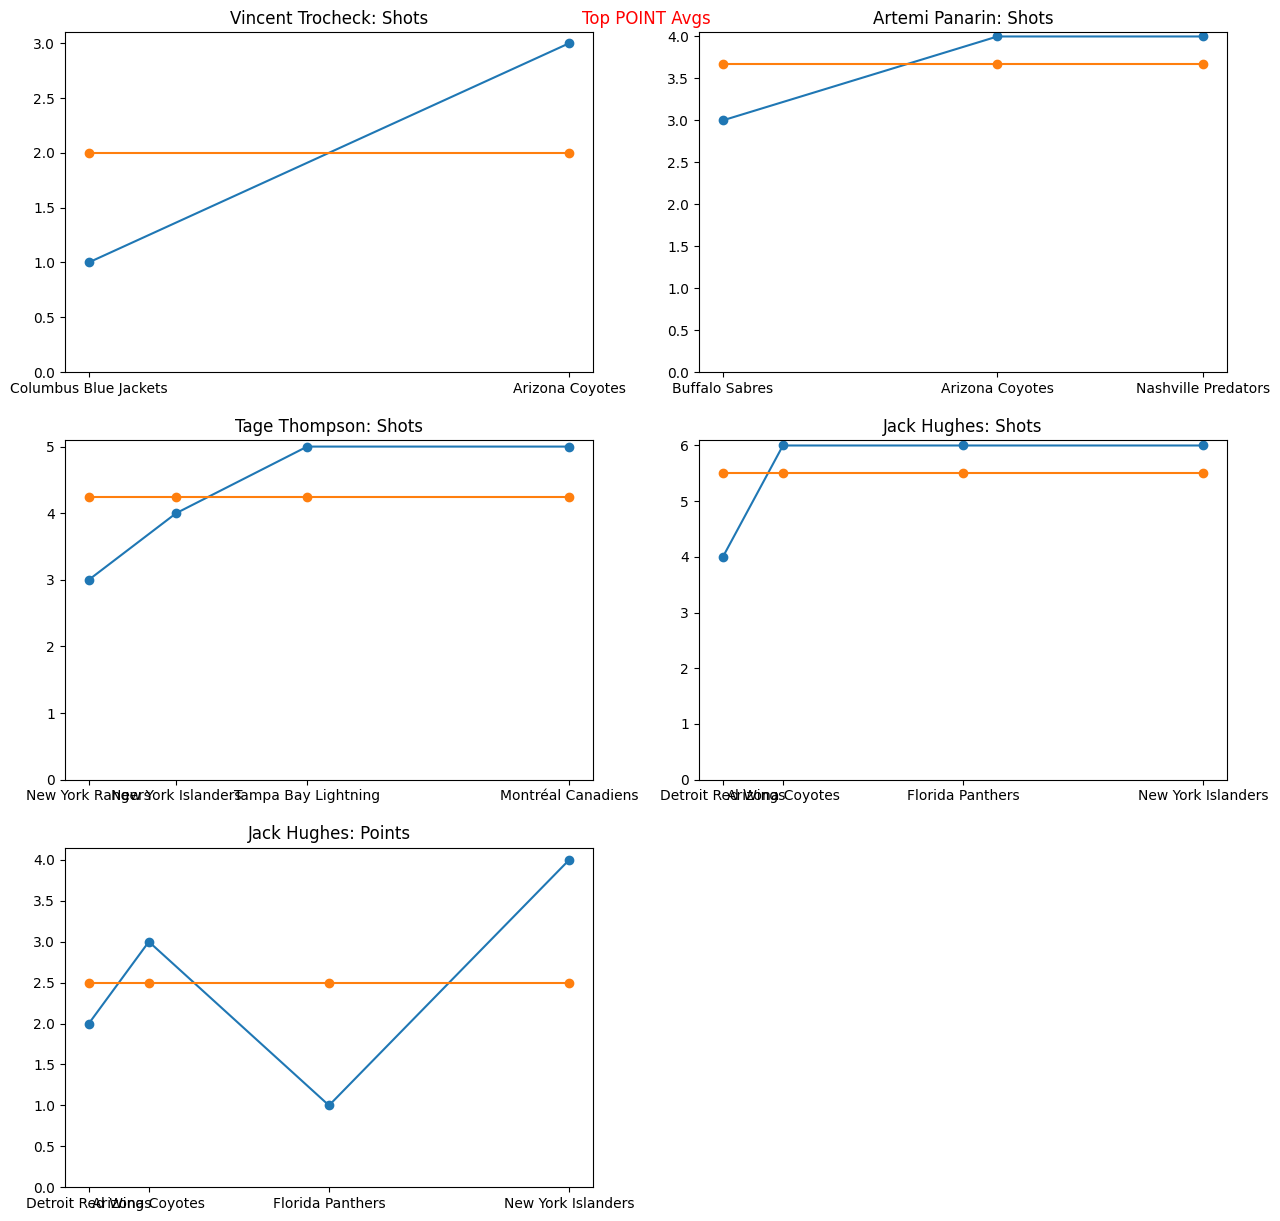

In [835]:
fig = plt.figure(figsize =(15, 15))
plt.title('Top POINT Avgs',color = 'Red')
plt.axis('off')
TeamList=['New York Rangers','Calgary Flames','Buffalo Sabres','New Jersey Devils']
ThisGame=StatsWithoutOutliers[StatsWithoutOutliers['TeamName'].isin(TeamList)]
AvgStatsTeamFilter=AvgStatsWithoutOutliers[AvgStatsWithoutOutliers['TeamName'].isin(TeamList)]


stat='Shots'
PlayerName='Vincent Trocheck'
Player=ThisGame[ThisGame['Name']==PlayerName].sort_values(by=['Date'], ascending=True)
plt.subplot(3, 2, 1)
plt.title(PlayerName+': '+stat)
plt.plot(Player['Date'], Player[stat], Player['Date'], Player['Avg'+stat] , marker = 'o')
plt.ylim(bottom=0)
plt.xticks(Player['Date'], Player['Opponent'])

PlayerName='Artemi Panarin'
Player=ThisGame[ThisGame['Name']==PlayerName].sort_values(by=['Date'], ascending=True)
plt.subplot(3, 2, 2)
plt.title(PlayerName+': '+stat)
plt.plot(Player['Date'], Player[stat], Player['Date'], Player['Avg'+stat] , marker = 'o')
plt.ylim(bottom=0)
plt.xticks(Player['Date'], Player['Opponent'])


PlayerName='Tage Thompson'
Player=ThisGame[ThisGame['Name']==PlayerName].sort_values(by=['Date'], ascending=True)
plt.subplot(3, 2, 3)
plt.title(PlayerName+': '+stat)
plt.plot(Player['Date'], Player[stat], Player['Date'], Player['Avg'+stat] , marker = 'o')
plt.ylim(bottom=0)
plt.xticks(Player['Date'], Player['Opponent'])


PlayerName='Jack Hughes'
Player=ThisGame[ThisGame['Name']==PlayerName].sort_values(by=['Date'], ascending=True)
plt.subplot(3, 2, 4)
plt.title(PlayerName+': '+stat)
plt.plot(Player['Date'], Player[stat], Player['Date'], Player['Avg'+stat] , marker = 'o')
plt.ylim(bottom=0)
plt.xticks(Player['Date'], Player['Opponent'])


PlayerName='Jack Hughes'
stat='Points'

Player=ThisGame[ThisGame['Name']==PlayerName].sort_values(by=['Date'], ascending=True)
plt.subplot(3, 2, 5)
plt.title(PlayerName+': '+stat)
plt.plot(Player['Date'], Player[stat], Player['Date'], Player['Avg'+stat] , marker = 'o')
plt.ylim(bottom=0)
plt.xticks(Player['Date'], Player['Opponent'])



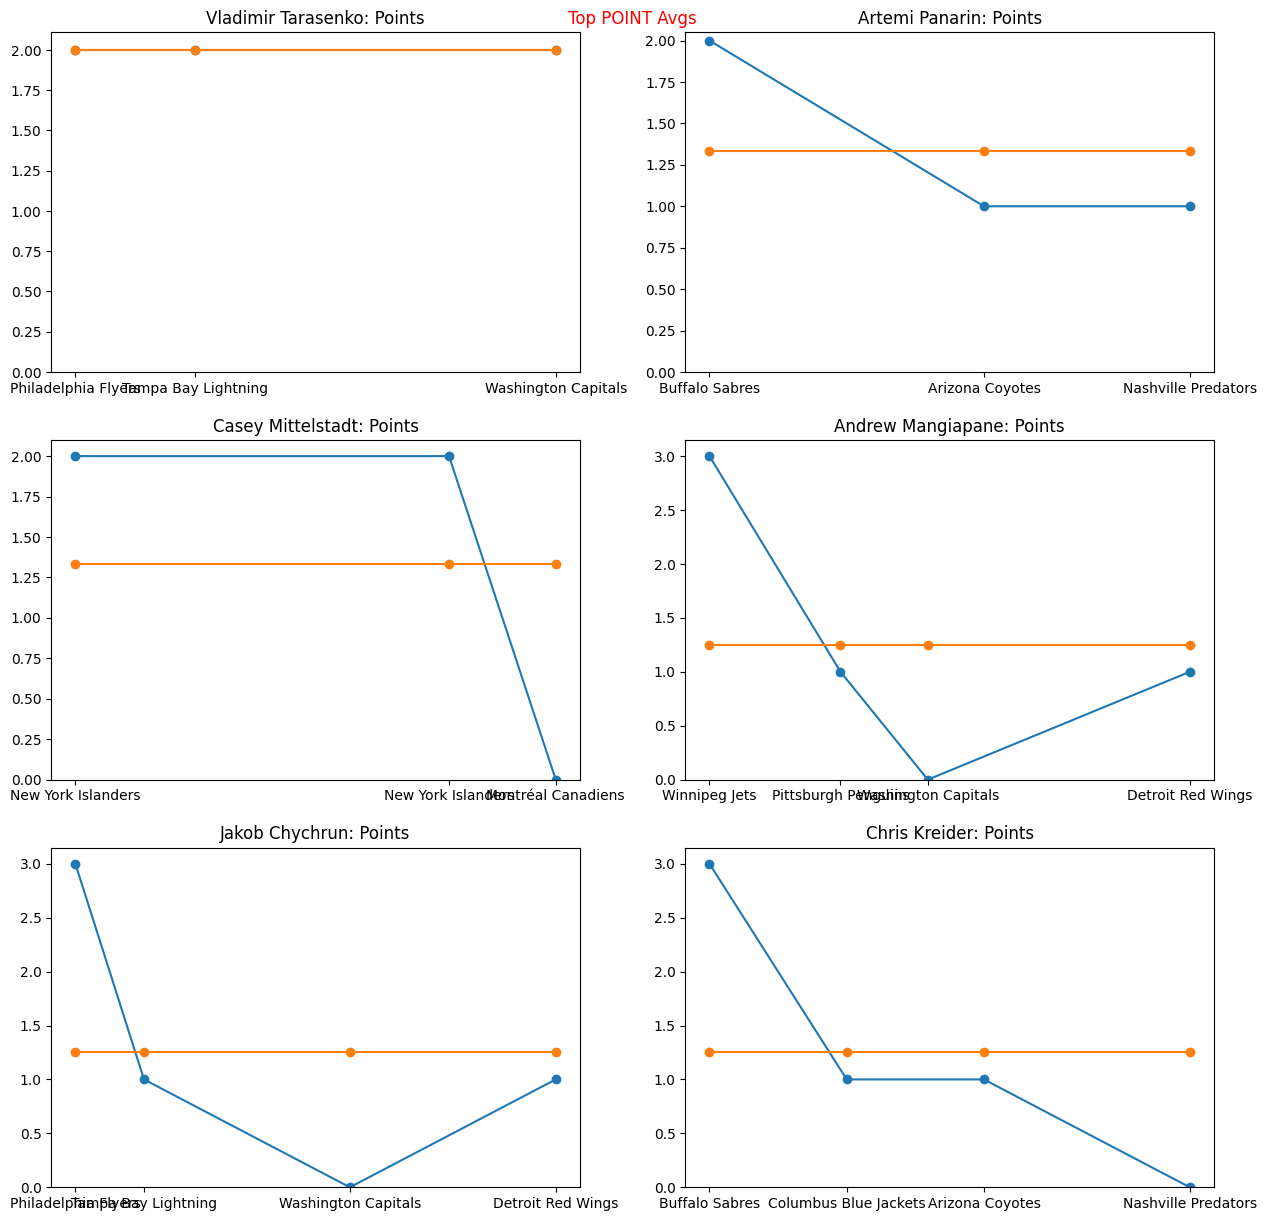

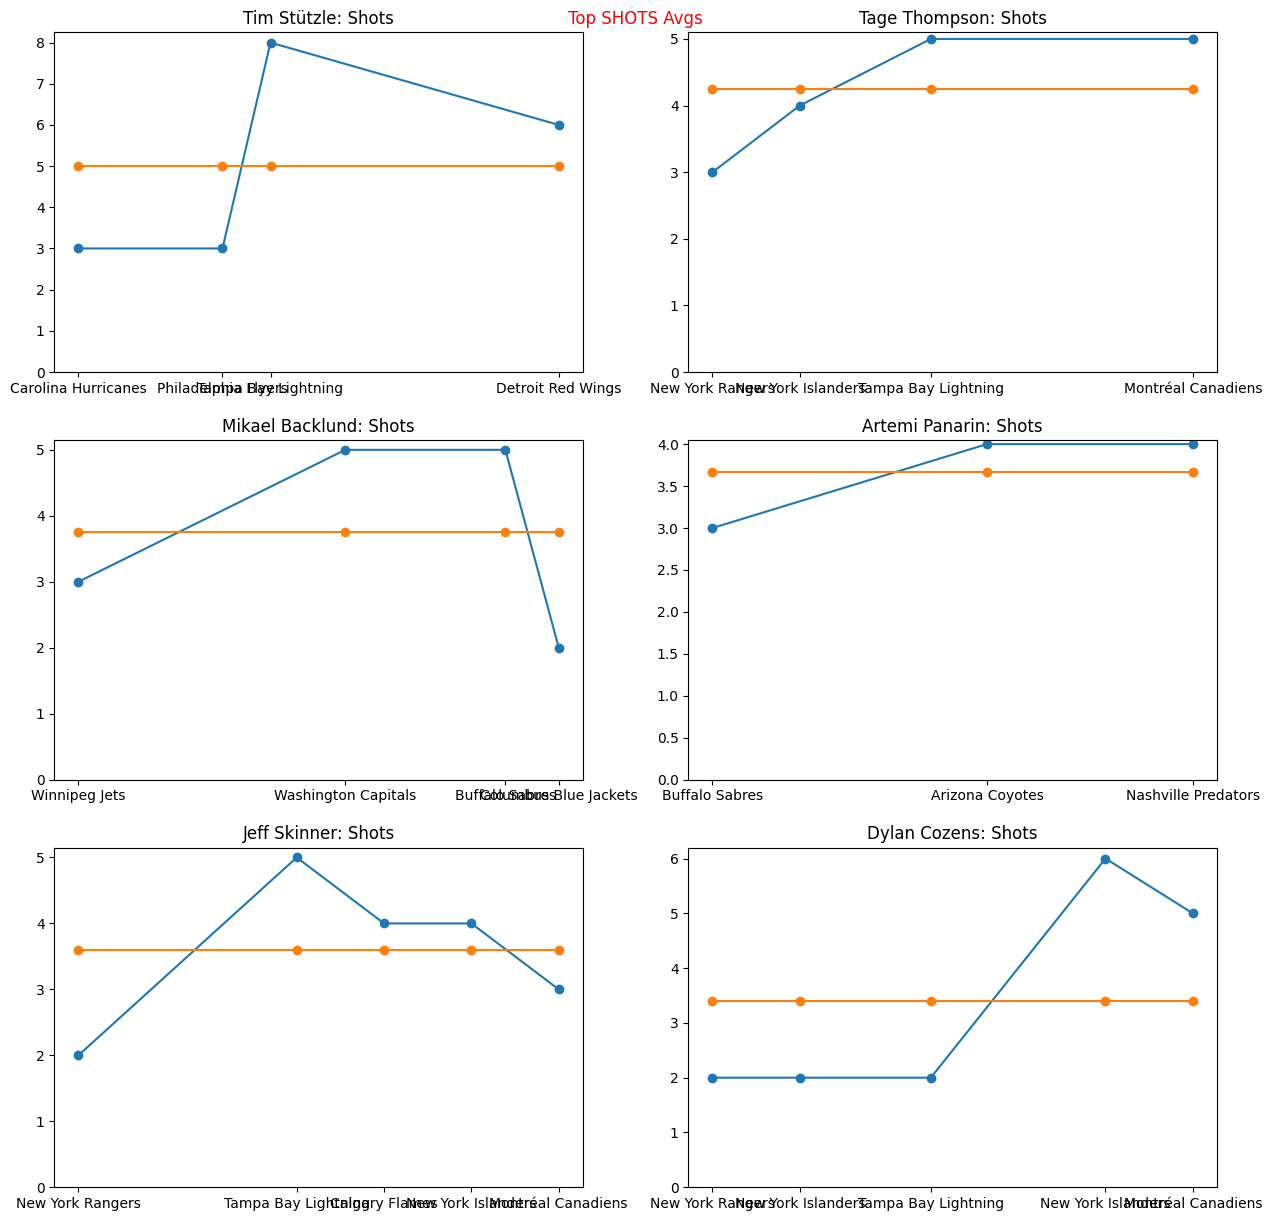

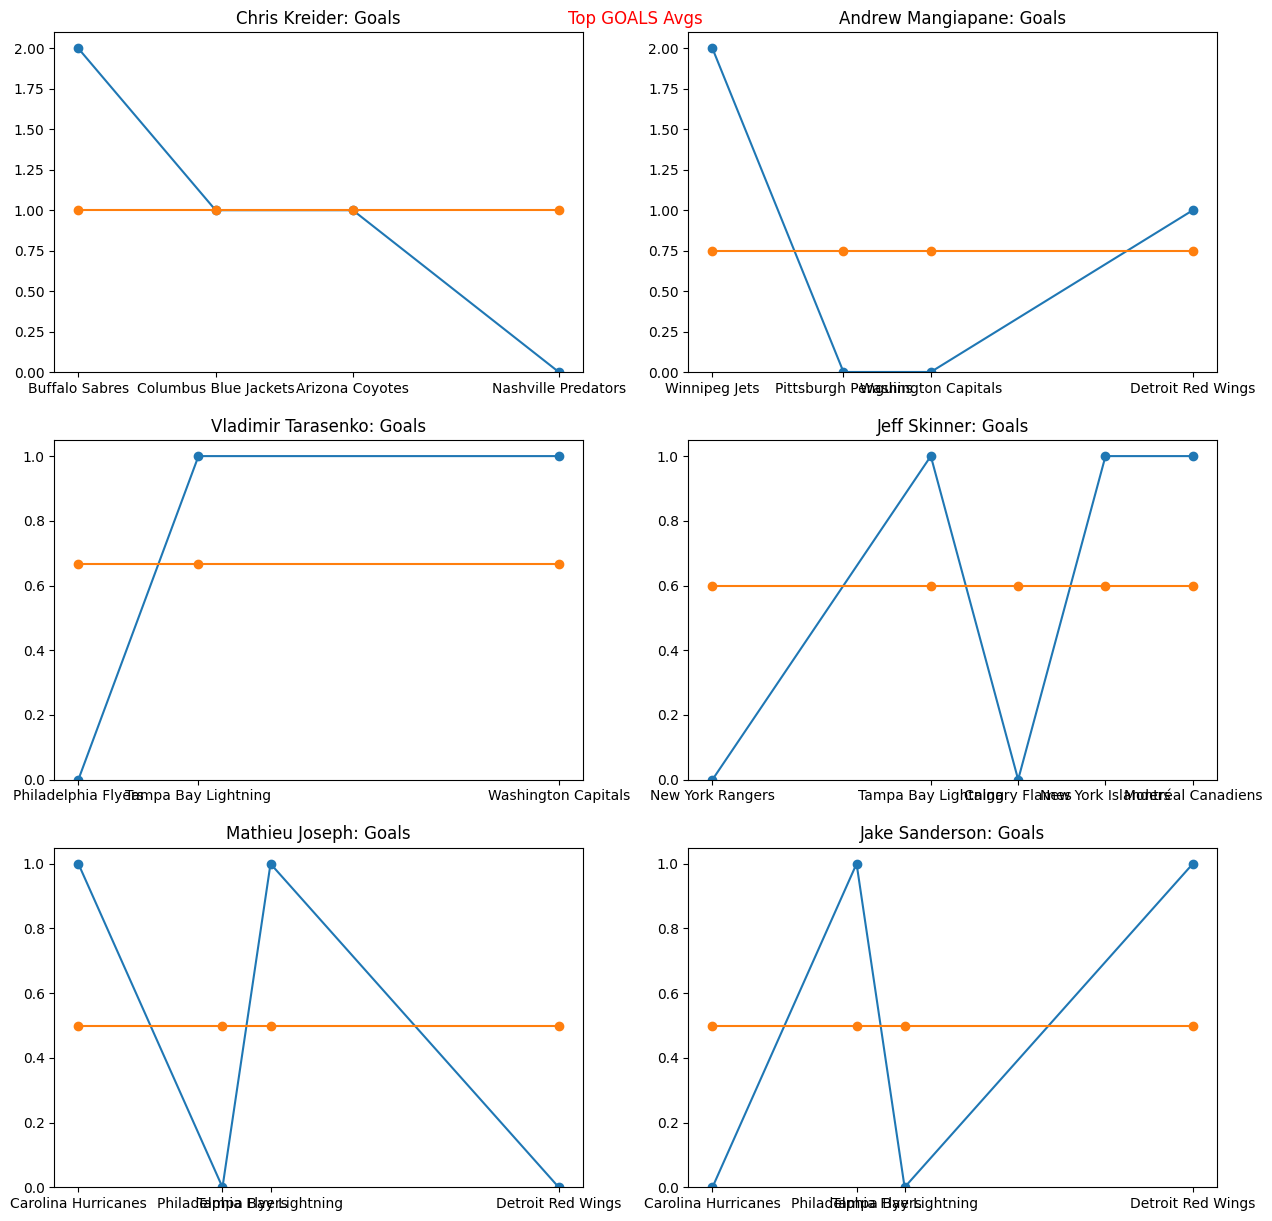

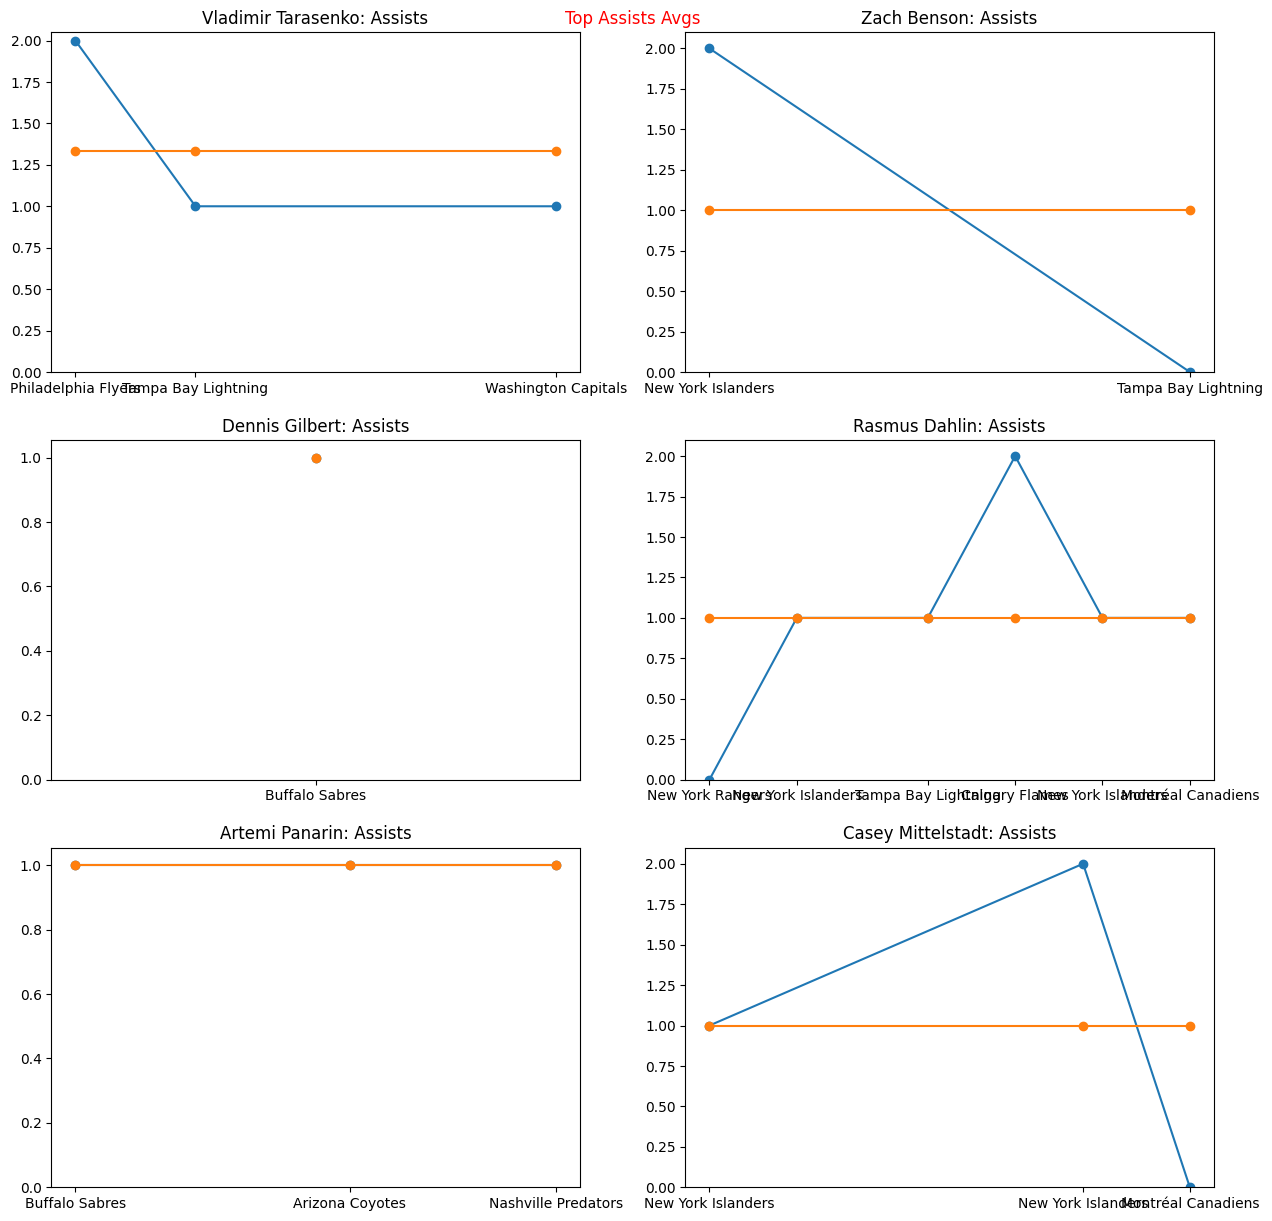

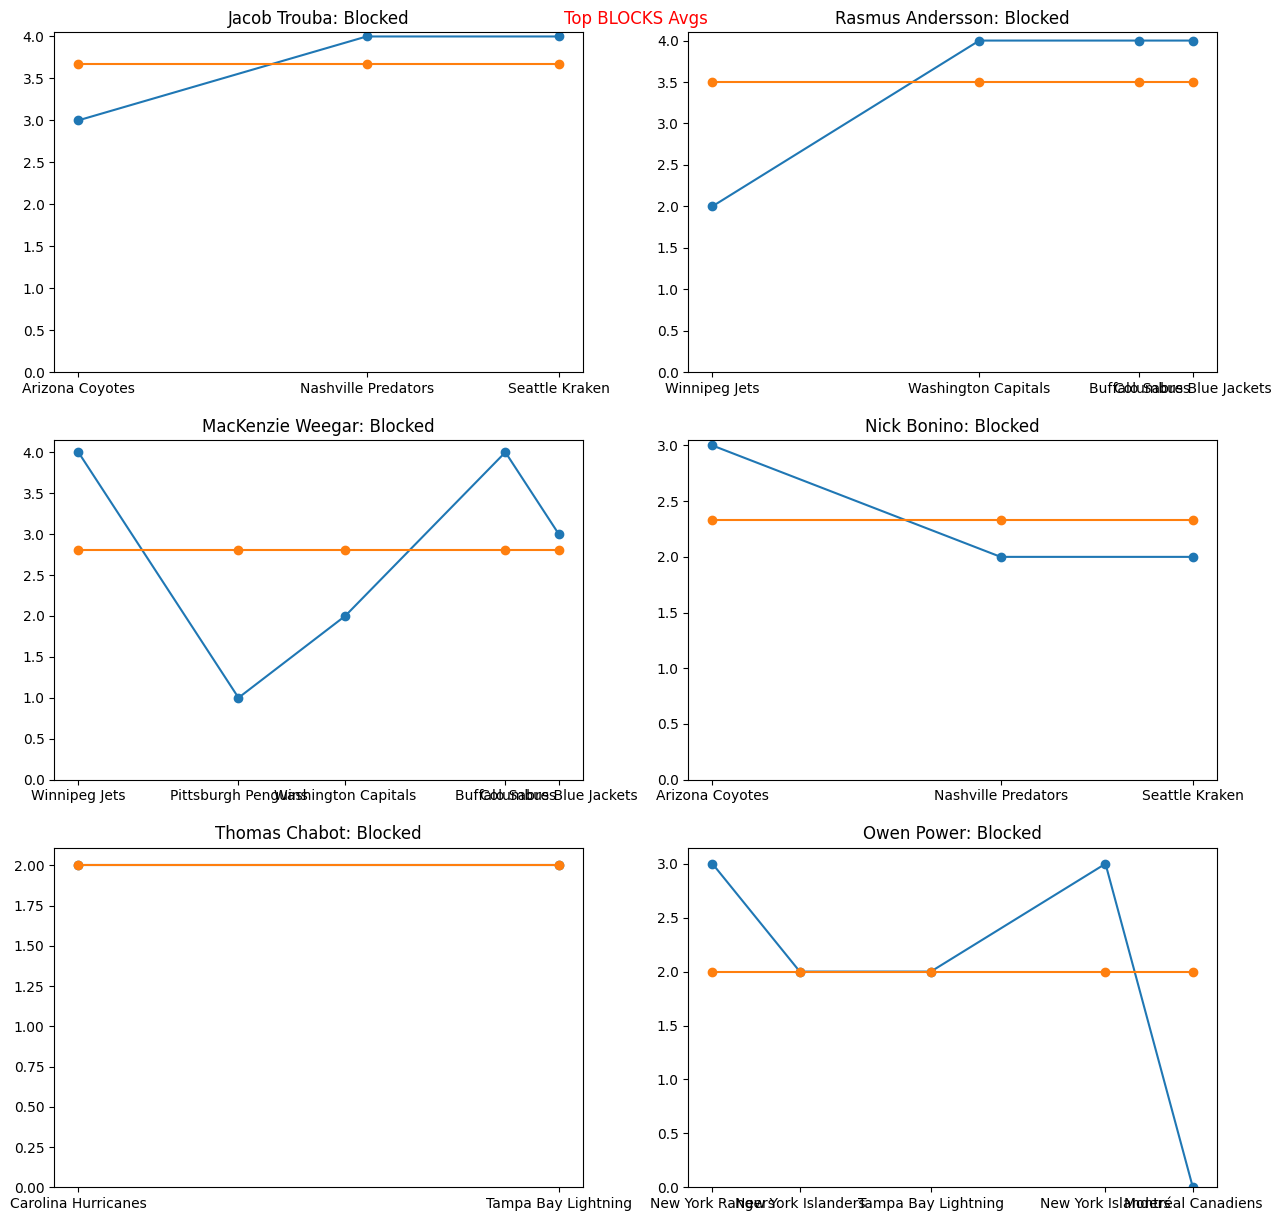

,Opponent,GoalsPerShotRank,PointsAgainstRank,GoalsAgainstRank,AssistsAgainstRank,ShotsAgainstRank,GP,AvgPointsAgainst,AvgGoalsAgainst,AvgAssistsAgainst,AvgShotsAgainst,GoalsPerShot
4,Buffalo Sabres,18.0,15.0,16.0,16.0,10.5,6,8.333333,3.000000,5.333333,28.833333,0.104046
11,Ottawa Senators,23.0,16.5,16.0,17.0,2.0,5,8.400000,3.000000,5.400000,26.800000,0.111940
14,Calgary Flames,27.0,25.0,24.0,27.0,12.0,6,9.833333,3.666667,6.166667,29.000000,0.126437
22,New York Rangers,17.0,7.0,6.0,8.0,1.0,5,6.600000,2.400000,4.200000,23.800000,0.100840


In [839]:
fig = plt.figure(figsize =(15, 15))
plt.title('Top POINT Avgs',color = 'Red')
plt.axis('off')
#AvgStatsWithoutOutliers[(AvgStatsWithoutOutliers['TeamName']=='New York Rangers')|(AvgStatsWithoutOutliers['TeamName']=='Calgary Flames')
TeamList=['New York Rangers','Calgary Flames','Buffalo Sabres','Ottawa Senators']
ThisGame=StatsWithoutOutliers[StatsWithoutOutliers['TeamName'].isin(TeamList)]
AvgStatsTeamFilter=AvgStatsWithoutOutliers[AvgStatsWithoutOutliers['TeamName'].isin(TeamList)]


# ThisGame=ExpandedStats[ExpandedStats['TeamName'].isin(Teams)]
# AvgStatsTeamFilter=AvgStats[AvgStats['TeamName'].isin(Teams)]
for i in range(0,6):
       stat='Points'
       PlayerName=AvgStatsTeamFilter.sort_values(by=['Avg'+stat], ascending=False).Name.iloc[i]
       Player=ThisGame[ThisGame['Name']==PlayerName].sort_values(by=['Date'], ascending=True)
       plt.subplot(3, 2, i+1)
       plt.title(PlayerName+': '+stat)
       plt.plot(Player['Date'], Player[stat], Player['Date'], Player['Avg'+stat] , marker = 'o')
       plt.ylim(bottom=0)
       plt.xticks(Player['Date'], Player['Opponent'])

plt.show()

fig = plt.figure(figsize =(15, 15))
plt.title('Top SHOTS Avgs',color = 'Red')
plt.axis('off')

for i in range(0,6):
       stat='Shots'
       PlayerName=AvgStatsTeamFilter.sort_values(by=['Avg'+stat], ascending=False).Name.iloc[i]
       Player=ThisGame[ThisGame['Name']==PlayerName].sort_values(by=['Date'], ascending=True)
       plt.subplot(3, 2, i+1)
       plt.title(PlayerName+': '+stat)
       plt.plot(Player['Date'], Player[stat], Player['Date'], Player['Avg'+stat] , marker = 'o')
       plt.ylim(bottom=0)
       plt.xticks(Player['Date'], Player['Opponent'])

plt.show()

fig = plt.figure(figsize =(15, 15))
plt.title('Top GOALS Avgs',color = 'Red')
plt.axis('off')

for i in range(0,6):

       stat='Goals'
       PlayerName=AvgStatsTeamFilter.sort_values(by=['Avg'+stat], ascending=False).Name.iloc[i]
       Player=ThisGame[ThisGame['Name']==PlayerName].sort_values(by=['Date'], ascending=True)
       plt.subplot(3, 2, i+1)
       plt.title(PlayerName+': '+stat)
       plt.plot(Player['Date'], Player[stat], Player['Date'], Player['Avg'+stat] , marker = 'o')
       plt.ylim(bottom=0)
       plt.xticks(Player['Date'], Player['Opponent'])

plt.show()

fig = plt.figure(figsize =(15, 15))
plt.title('Top Assists Avgs',color = 'Red')
plt.axis('off')
for i in range(0,6):

       stat='Assists'
       PlayerName=AvgStatsTeamFilter.sort_values(by=['Avg'+stat], ascending=False).Name.iloc[i]
       Player=ThisGame[ThisGame['Name']==PlayerName].sort_values(by=['Date'], ascending=True)
       plt.subplot(3, 2, i+1)
       plt.title(PlayerName+': '+stat)
       plt.plot(Player['Date'], Player[stat], Player['Date'], Player['Avg'+stat] , marker = 'o')
       plt.ylim(bottom=0)
       plt.xticks(Player['Date'], Player['Opponent'])

plt.show()

fig = plt.figure(figsize =(15, 15))
plt.title('Top BLOCKS Avgs',color = 'Red')
plt.axis('off')

for i in range(0,6):

       stat='Blocked'
       PlayerName=AvgStatsTeamFilter.sort_values(by=['Avg'+stat], ascending=False).Name.iloc[i]
       Player=ThisGame[ThisGame['Name']==PlayerName].sort_values(by=['Date'], ascending=True)
       plt.subplot(3, 2, i+1)
       plt.title(PlayerName+': '+stat)
       plt.plot(Player['Date'], Player[stat], Player['Date'], Player['Avg'+stat] , marker = 'o')
       plt.ylim(bottom=0)
       plt.xticks(Player['Date'], Player['Opponent'])

plt.show()


rankfilter=OpponentStats[['Opponent', 'GoalsPerShotRank',
       'PointsAgainstRank', 'GoalsAgainstRank', 'AssistsAgainstRank',
       'ShotsAgainstRank','GP','AvgPointsAgainst',
       'AvgGoalsAgainst', 'AvgAssistsAgainst', 'AvgShotsAgainst', 'GoalsPerShot']]

rankfilter[rankfilter['Opponent'].isin(TeamList)]